#### `Bibliotecas`

In [1]:
import math
import matplotlib.pyplot as plt

#### 1. Implementação da Regra Composta dos Trapézios & Função de Erro

In [2]:
def trapezoidal_rule_compound(f, a: float, b: float, n: int) -> float:
    """
    f: Função
    a: Limite inferior
    b: Limite superior
    n: Número de subintervalos

    return: Valor aproximado da integral desejada
    """
    # Cálculo do h
    h = (b - a) / n
    # Inicialização da integral
    integral = f(a) + f(b)
    # Soma nos pontos intermediários
    for i in range(1, n, 1):
        xi = a + i * h
        integral += 2 * f(xi)
    integral *= h / 2
    return integral

In [3]:
def calculate_n(a: float, b: float, max_f_double_prime: float, error_max: float = 1e-3) -> int:
    """
    a: Limite inferior
    b: Limite superior
    max_f_double_prime: Valor máximo da segunda derivada de f no intervalo [a, b]
    error_max: Erro máximo -- padrão: 0.0001

    return: Valor de `n` subintervalos com arredondamento para cima
    """
    # Seguindo a fórmula:
    # n >= raíz( (b-a)^3 . max|f''(x)| ) / (12)error 
    n = math.sqrt( ((b - a)**3 * max_f_double_prime) / (12 * error_max) )
    return math.ceil(n)

#### 1.2 Aplicação

In [4]:
# Função
f = lambda x: 1.0 / x

# Limites inferior e superior
a = 3.0
b = 3.6

# Erro máximo
error_max = 1e-3  # 0.0001 -- Não necessário, pois na função já está padrão

# Cálculo do número de subintervalos
n = calculate_n(a=a, b=b, max_f_double_prime=2, error_max=error_max)
# Cálculo da integral numérica
I = trapezoidal_rule_compound(f=f, a=a, b=b, n=n)

# ---- Resultados ----
# Arredondamento para 5 casas
I = round(I, 5)

print("[*] SOLUÇÃO:")
print("\nNúmero de subintervalos:")
print(f"n = {n}")

print("\nA integral numérica de f(x) = 1/x é:")
print(f"I aproximadamente: {I}")

[*] SOLUÇÃO:

Número de subintervalos:
n = 7

A integral numérica de f(x) = 1/x é:
I aproximadamente: 0.18234


#### 2. Implementação da Regra dos Trapézios

In [5]:
def trapezoidal_rule(X: list, Y: list) -> float:
    """
    X: Lista com os valores de x
    Y: Lista com os valores de y

    return: Valor aproximado da integração numérica
    utilizando a Regra dos Trapézios
    """
    assert len(X) == len(Y)
    # Adquirir o valor de `n` através da quantidade de dados
    n = len(X) - 1
    # Calculo da integral numérica
    integral = 0.0
    for i in range(n):
        h = X[i+1] - X[i]
        integral += (Y[i] + Y[i+1]) * h / 2
    return integral

#### 2.1 Aplicação

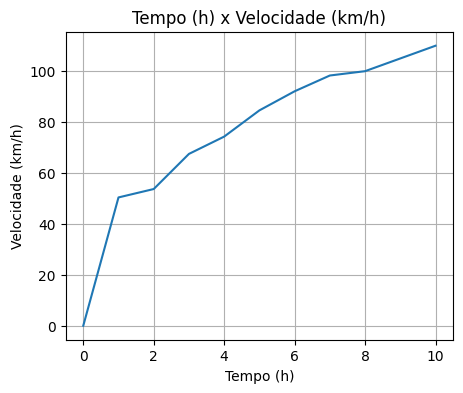

[*] SOLUÇÃO:

Através dos dados fornecidos de Tempo e Velocidade:
O valor aproximado da Disância (d) foi de 780.9 km


In [6]:
# Tempos
X = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
# Velocidades
Y = [0, 50.4, 53.7, 67.5, 74.3, 84.6, 92.1, 98.3, 100, 105, 110]

# Visualização dos dados
plt.figure(figsize=(5, 4))
plt.plot(X, Y)
plt.grid(True)
plt.title("Tempo (h) x Velocidade (km/h)")
plt.xlabel("Tempo (h)")
plt.ylabel("Velocidade (km/h)")
plt.show()

# Calculo da distância utilizando a Regra dos Trapézios
d = trapezoidal_rule(X=X, Y=Y)

# Resultados
print("[*] SOLUÇÃO:")
print("\nAtravés dos dados fornecidos de Tempo e Velocidade:")
print(f"O valor aproximado da Disância (d) foi de {d} km")